In [19]:
import pandas as pd

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset to understand its structure
print(train_data.head())
print(test_data.head())

# Check for missing values
print(train_data.isnull().sum())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [20]:
# Handle missing values by dropping rows with missing values for simplicity
train_data = train_data.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])
test_data = test_data.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath'])

# Check if the datasets are empty after dropping rows
print(f"Number of samples in the training data: {train_data.shape[0]}")
print(f"Number of samples in the test data: {test_data.shape[0]}")

if train_data.shape[0] == 0 or test_data.shape[0] == 0:
    raise ValueError("The dataset is empty after preprocessing. Please check the dataset and preprocessing steps.")

# Rename columns for consistency
train_data.rename(columns={'GrLivArea': 'square_footage', 'BedroomAbvGr': 'bedrooms', 'FullBath': 'bathrooms'}, inplace=True)
test_data.rename(columns={'GrLivArea': 'square_footage', 'BedroomAbvGr': 'bedrooms', 'FullBath': 'bathrooms'}, inplace=True)


Number of samples in the training data: 1460
Number of samples in the test data: 1459


In [21]:
from sklearn.model_selection import train_test_split

# Feature Selection
features = ['square_footage', 'bedrooms', 'bathrooms']
target = 'SalePrice'

# Splitting Data
X = train_data[features]
y = train_data[target]

# Add a check to ensure that X and y are not empty
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("The features or target array is empty. Please check the dataset and feature selection steps.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [22]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R² Score: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.62145386 0.60156941 0.61816512 0.58870218 0.44695773]
Mean Cross-Validation R² Score: 0.5753696622863029


In [23]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')


Training MSE: 2689860234.4648304
Testing MSE: 2642371133.2388525
Training R²: 0.5261888640275756
Testing R²: 0.6354151777518393


      Actual      Predicted
892   154500  115158.033325
1105  325000  295328.645206
413   115000  137090.531567
522   159000  203612.000682
1036  315500  225161.548424


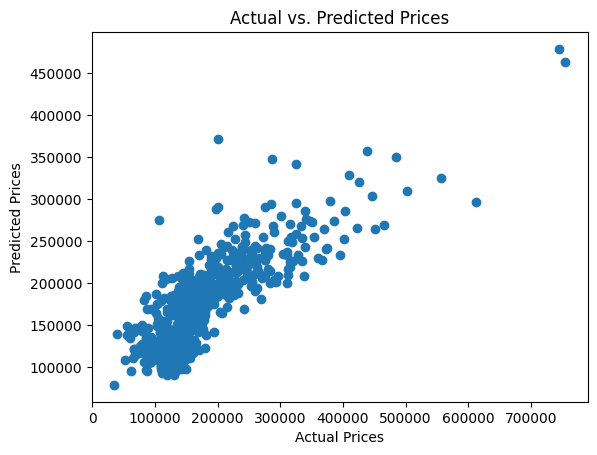

In [25]:
import matplotlib.pyplot as plt

# Inspect the Predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print(predictions_df.head())

# Plot Actual vs. Predicted
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R² Score: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.62145386 0.60156941 0.61816512 0.58870218 0.44695773]
Mean Cross-Validation R² Score: 0.5753696622863029


In [27]:
# Prediction on Test Set
X_new = test_data[features]
X_new = scaler.transform(X_new)  # Normalize

predicted_prices = model.predict(X_new)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predicted_prices})
output.to_csv('submission.csv', index=False)

print(output.head())


     Id      SalePrice
0  1461  124453.165098
1  1462  140145.553389
2  1463  200261.183815
3  1464  197867.743196
4  1465  192610.756005
